In [106]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
##################################reference: gemini eval (rushikesh)############################################

In [107]:
def plot_conf_mat(ytrue,ypred,title):
    cm = confusion_matrix(ytrue,ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Composite','Prime'])
    disp.plot()
    plt.title(title)

In [108]:
def find_factors(n):
    factors = []
    for i in range(1,n+1):
        if n%i == 0:
            factors.append(i)
    return factors

In [109]:
def is_factorization_correct(num,factors):
    #factors
    if num != factors[-1]:
        return False
    if 1 not in factors:
        return False
    i=0
    l= len(factors)-1
    while i<l:
        if factors[i]*factors[l-i] != num:
            return False
        i+=1
        
    return True

In [110]:
# read in the primality test data
with open("primality_test.json","r") as file:
    test_data = json.load(file)

primes = set(test_data['primes'])
composites = set(test_data['composites'])

In [111]:
def extract_file(file_name):

    responses=[]
    with open(file_name,"r") as file:
        
        for line in file:
            #62731 =  factors = [1, 3, 9, 27, 81, 243, 62731] 
            #print(line)
            line= line.strip()
            parts = line.split("=")
            try:
                num = int(parts[0])
            except:
                print("Error in line",line)
                continue
            
            try:
                factors = list(map(int,re.findall(r'\d+',parts[-1])))
                #if factors not empty then add to responses
                if factors:
                    responses.append((num,factors))

            except:
                print("Error in line",line)
                #remove nu
                continue

            
    return responses

In [112]:
file_names=['prime_factors.txt','composite_factors.txt']\

responses=[]

for file_name in file_names:
    #print(file_name)
    responses.extend(extract_file(file_name))

print(len(responses))


Error in line 
Error in line Please note that I will be asking you to find the factors of different numbers in future.
7138


In [113]:
print(responses[:10])

[(2, [1, 2]), (23, [1, 7, 23]), (31, [1, 3, 9, 31]), (37, [1, 3, 19, 37]), (41, [1, 7, 41]), (47, [1, 3, 19, 47]), (67, [1, 3, 23, 67]), (73, [1, 3, 21, 73]), (83, [1, 3, 9, 27, 83]), (89, [1, 7, 89])]


In [114]:
# check if factors indeed get multiplied to give the number
factorization_correct = []
wrong_examples = []
for num,factors in responses:
    #print(num,factors)
    factorization_correct.append(is_factorization_correct(num,factors))
    if not is_factorization_correct(num,factors):
        wrong_examples.append((num,factors))

print("Factorization correct: ",np.sum(factorization_correct))
print("factorization accuracy: ",np.mean(factorization_correct)*100,'%')

Factorization correct:  2
factorization accuracy:  0.02801905295601009 %


In [115]:
# visualize some wrong examples
# number, factors, product
wrong_examples[np.random.randint(0,len(wrong_examples))]

(5212, [1, 7, 49, 5212])

True number of primes:  3266
True number of composites:  3872
Predicted number of primes:  1
Predicted number of composites:  7137


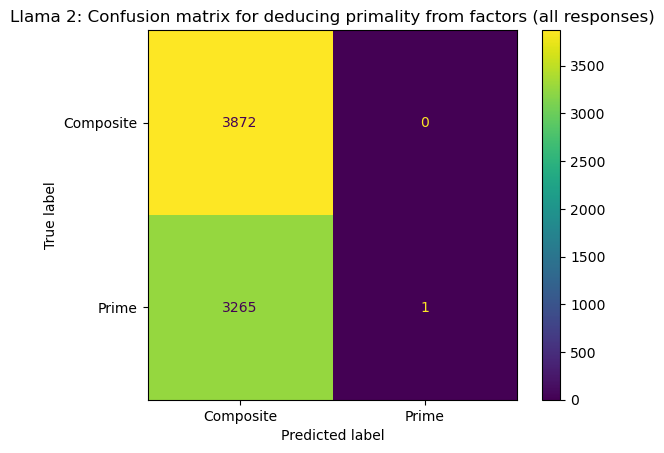

In [116]:
# using all responses
y_true_factor_all_resp = []
y_pred_factor_all_resp = []

for num,factors in responses:
    if num in primes:
        y_true_factor_all_resp.append(1)
    elif num in composites:
        y_true_factor_all_resp.append(0)
    else:
        print("Number not found in test data: ",num)
    
    if len(factors) == 2 and 1 in factors and num in factors:
        y_pred_factor_all_resp.append(1)
    else:
        y_pred_factor_all_resp.append(0)

print("True number of primes: ",np.sum(y_true_factor_all_resp))
print("True number of composites: ",len(y_true_factor_all_resp)-np.sum(y_true_factor_all_resp))

print("Predicted number of primes: ",np.sum(y_pred_factor_all_resp))
print("Predicted number of composites: ",len(y_pred_factor_all_resp)-np.sum(y_pred_factor_all_resp))

plot_conf_mat(y_true_factor_all_resp,y_pred_factor_all_resp,"Llama 2: Confusion matrix for deducing primality from factors (all responses)")

True number of primes:  1
True number of composites:  1
Predicted number of primes:  1
Predicted number of composites:  1


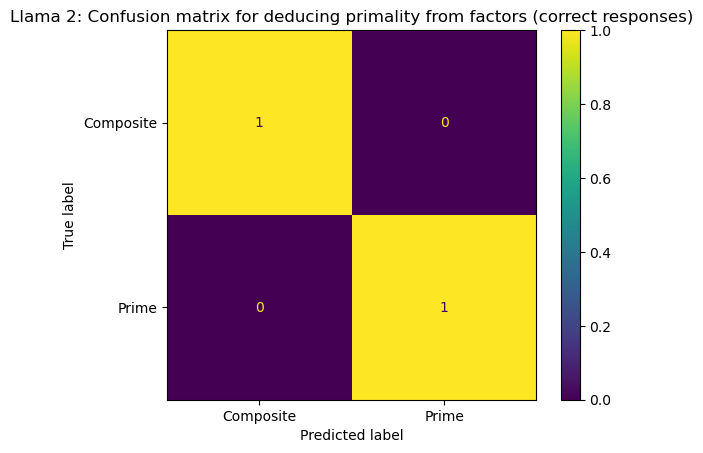

In [117]:
# using only correct responses
y_true_factor_correct_resp = []
y_pred_factor_correct_resp = []

for num,factors in responses:

    if not is_factorization_correct(num,factors):
        continue

    if num in primes:
        y_true_factor_correct_resp.append(1)
    elif num in composites:
        y_true_factor_correct_resp.append(0)
    else:
        print("Number not found in test data: ",num)
    
    if len(factors) == 2 and 1 in factors and num in factors:
        y_pred_factor_correct_resp.append(1)
    else:
        y_pred_factor_correct_resp.append(0)

print("True number of primes: ",np.sum(y_true_factor_correct_resp))
print("True number of composites: ",len(y_true_factor_correct_resp)-np.sum(y_true_factor_correct_resp))

print("Predicted number of primes: ",np.sum(y_pred_factor_correct_resp))
print("Predicted number of composites: ",len(y_pred_factor_correct_resp)-np.sum(y_pred_factor_correct_resp))

plot_conf_mat(y_true_factor_correct_resp,y_pred_factor_correct_resp,"Llama 2: Confusion matrix for deducing primality from factors (correct responses)")